<a href="https://colab.research.google.com/github/janithabimasha/telecom_churn_prediction_model/blob/main/TelecomChurnPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

tel_data = "/content/drive/MyDrive/MSc Project/Categorised dataset.csv"
df = pd.read_csv(tel_data)
df.head()

,GEN,SEN_CIT,PAR,DEP,TEN,PHO_SER,MUL_LIN,INT_SER,ONL_SEC,ONL_BAC,DEV_PRO,TEC_SUP,STR_TV,STR_MOV,MON_CHA,TOT_CHA,CHU
0,2,0,1,0,1,0,0,1,1,1,1,0,0,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,42.30,1840.75,0
4,2,0,0,0,2,1,0,1,0,0,0,0,0,0,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GEN      7043 non-null   int64  
 1   SEN_CIT  7043 non-null   int64  
 2   PAR      7043 non-null   int64  
 3   DEP      7043 non-null   int64  
 4   TEN      7043 non-null   int64  
 5   PHO_SER  7043 non-null   int64  
 6   MUL_LIN  7043 non-null   int64  
 7   INT_SER  7043 non-null   int64  
 8   ONL_SEC  7043 non-null   int64  
 9   ONL_BAC  7043 non-null   int64  
 10  DEV_PRO  7043 non-null   int64  
 11  TEC_SUP  7043 non-null   int64  
 12  STR_TV   7043 non-null   int64  
 13  STR_MOV  7043 non-null   int64  
 14  MON_CHA  7043 non-null   float64
 15  TOT_CHA  7043 non-null   float64
 16  CHU      7043 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 935.5 KB


In [ ]:
df.shape

(7043, 17)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(6993, 17)

In [ ]:
df.isnull().sum()

GEN        0
SEN_CIT    0
PAR        0
DEP        0
TEN        0
PHO_SER    0
MUL_LIN    0
INT_SER    0
ONL_SEC    0
ONL_BAC    0
DEV_PRO    0
TEC_SUP    0
STR_TV     0
STR_MOV    0
MON_CHA    0
TOT_CHA    0
CHU        0
dtype: int64

In [ ]:
df['SUM_SER']= df.iloc[:, 5:14].sum(axis=1)
df

,GEN,SEN_CIT,PAR,DEP,TEN,PHO_SER,MUL_LIN,INT_SER,ONL_SEC,ONL_BAC,DEV_PRO,TEC_SUP,STR_TV,STR_MOV,MON_CHA,TOT_CHA,CHU,SUM_SER
0,2,0,1,0,1,0,0,1,1,1,1,0,0,0,29.85,29.85,0,4
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,56.95,1889.50,0,4
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,53.85,108.15,1,4
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,42.30,1840.75,0,4
4,2,0,0,0,2,1,0,1,0,0,0,0,0,0,70.70,151.65,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,84.80,1990.50,0,8
7039,2,0,1,1,72,1,1,1,0,1,1,0,1,1,103.20,7362.90,0,7
7040,2,0,1,1,11,0,0,1,1,0,0,0,0,0,29.60,346.45,0,2
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,74.40,306.60,1,3


In [ ]:
df=df.drop(columns=['PHO_SER','MUL_LIN','INT_SER','ONL_SEC','ONL_BAC','DEV_PRO','TEC_SUP','STR_TV','STR_MOV'])

In [ ]:
df.shape

(6993, 9)

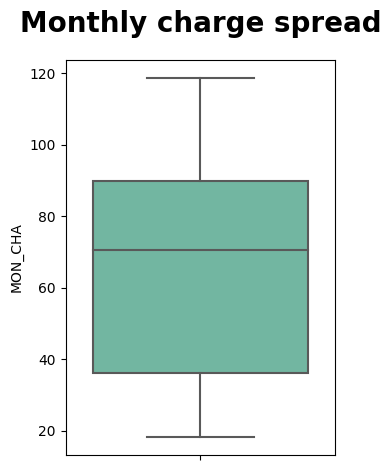

In [ ]:
plt.subplot(1,2,2)
sns.boxplot(y=df["MON_CHA"],palette="Set2")
plt.title("Monthly charge spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

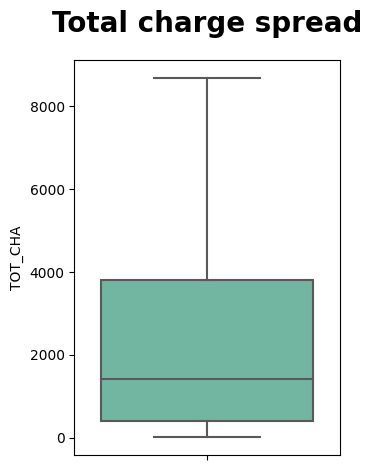

In [ ]:
plt.subplot(1,2,2)
sns.boxplot(y=df["TOT_CHA"],palette="Set2")
plt.title("Total charge spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,GEN,SEN_CIT,PAR,DEP,TEN,MON_CHA,TOT_CHA,CHU,SUM_SER
0,2,0,1,0,1,29.85,29.85,0,4
1,1,0,0,0,34,56.95,1889.50,0,4
2,1,0,0,0,2,53.85,108.15,1,4
3,1,0,0,0,45,42.30,1840.75,0,4
4,2,0,0,0,2,70.70,151.65,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6993 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GEN      6993 non-null   int64  
 1   SEN_CIT  6993 non-null   int64  
 2   PAR      6993 non-null   int64  
 3   DEP      6993 non-null   int64  
 4   TEN      6993 non-null   int64  
 5   MON_CHA  6993 non-null   float64
 6   TOT_CHA  6993 non-null   float64
 7   CHU      6993 non-null   int64  
 8   SUM_SER  6993 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 546.3 KB


In [ ]:
df.describe()

,GEN,SEN_CIT,PAR,DEP,TEN,MON_CHA,TOT_CHA,CHU,SUM_SER
count,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000
mean,1.496067,0.163163,0.486486,0.301730,32.595453,65.023302,2298.462412,0.264550,4.167596
std,0.500020,0.369541,0.499853,0.459042,24.502926,30.003759,2265.149448,0.441125,2.307075
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,36.250000,416.300000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,70.500000,1415.550000,0.000000,4.000000
75%,2.000000,0.000000,1.000000,1.000000,56.000000,89.950000,3815.400000,1.000000,6.000000
max,2.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000,9.000000


In [ ]:
df.nunique()

GEN           2
SEN_CIT       2
PAR           2
DEP           2
TEN          73
MON_CHA    1585
TOT_CHA    6530
CHU           2
SUM_SER       9
dtype: int64

<Axes: >

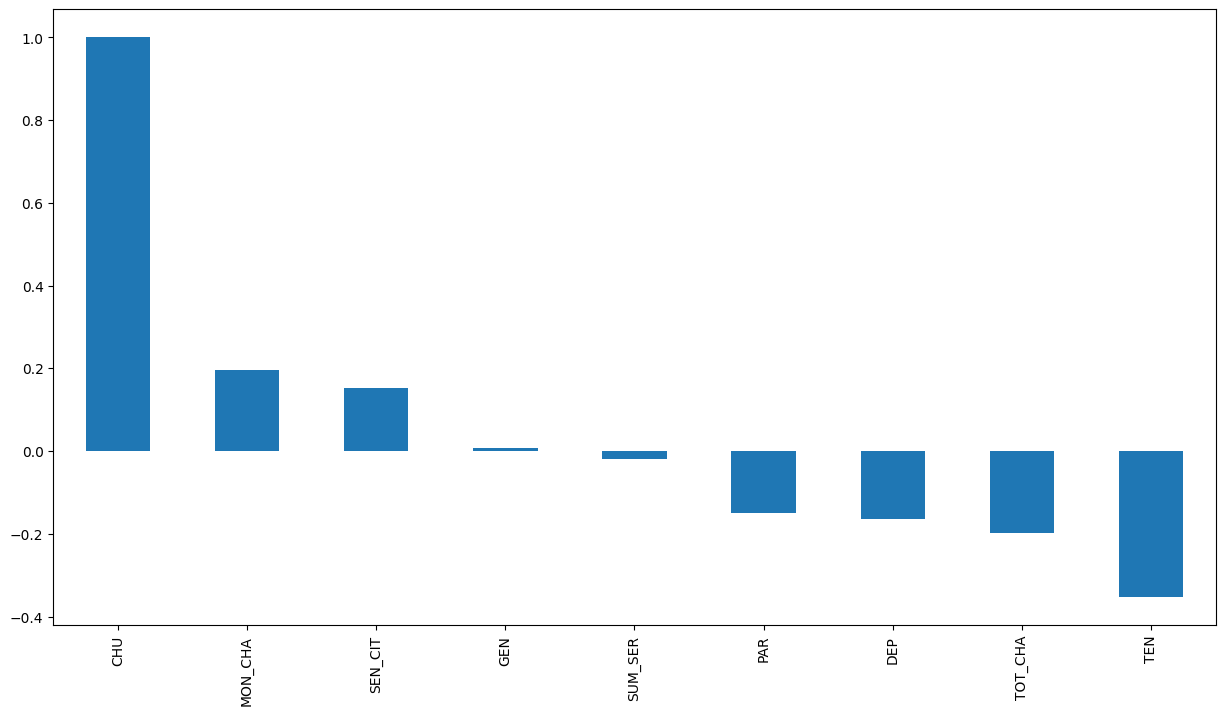

In [ ]:
plt.figure(figsize=(15,8))
df.corr()['CHU'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'Gender Distribution')

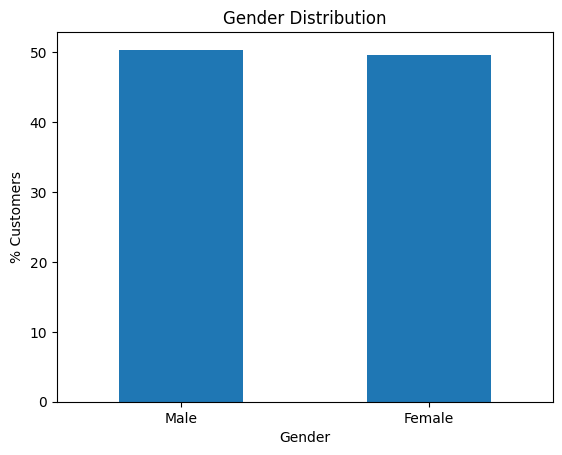

In [ ]:
ax = (df['GEN'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0)
plt.xticks((0, 1),('Male','Female'))
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

Text(0.5, 1.0, '% of Senior Citizens')

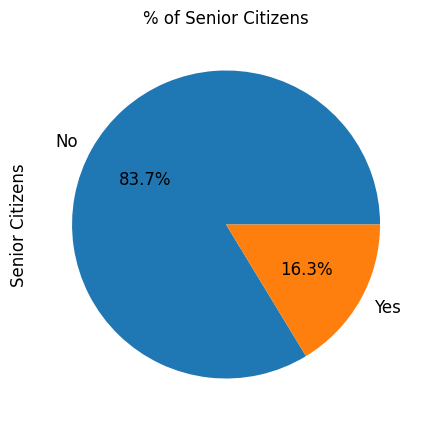

In [ ]:
ax = (df['SEN_CIT'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

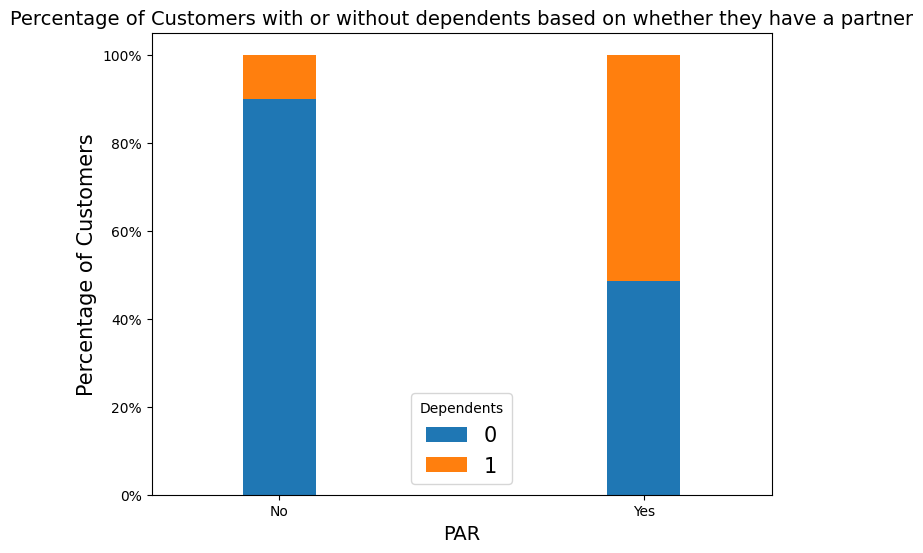

In [ ]:
par_dep = df.groupby(['PAR','DEP']).size().unstack()
ax = (par_dep.T*100.0 / par_dep.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks((0, 1),('No','Yes'))
ax.legend(prop={'size':15},title = 'Dependents',fontsize =15)
ax.set_ylabel('Percentage of Customers',size = 15)
ax.set_title('Percentage of Customers with or without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

Text(0.5, 1.0, 'Number of customers by their tenure')

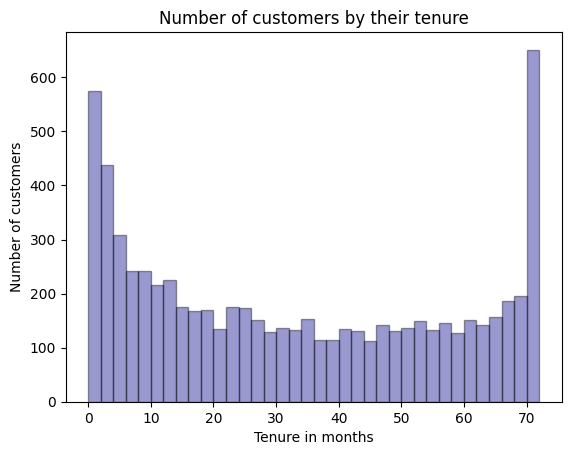

In [ ]:
ax = sns.distplot(df['TEN'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})
ax.set_ylabel('Number of customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Number of customers by their tenure')

Text(0.5, 1.0, 'Churn Rate')

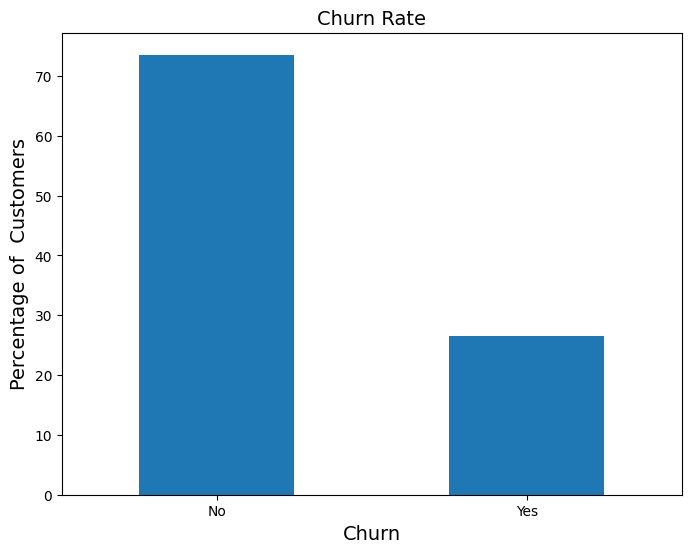

In [ ]:
ax = (df['CHU'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,figsize = (8,6))
plt.xticks((0, 1),('No','Yes'))
ax.set_ylabel('Percentage of  Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

([<matplotlib.axis.XTick at 0x7b58045ca530>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

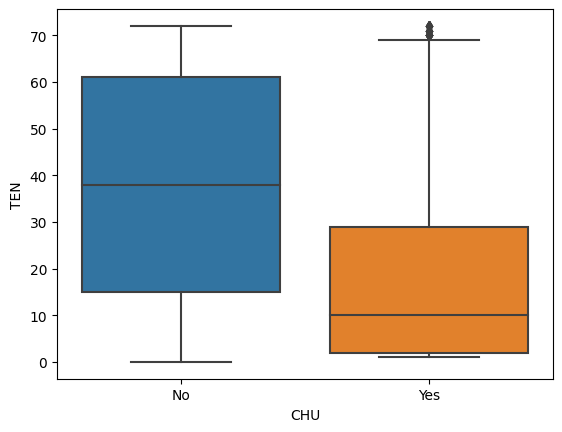

In [ ]:
sns.boxplot(x = df.CHU, y = df.TEN)
plt.xticks((0, 1),('No','Yes'))

Text(0.5, 1.0, 'Churn by Seniority Level')

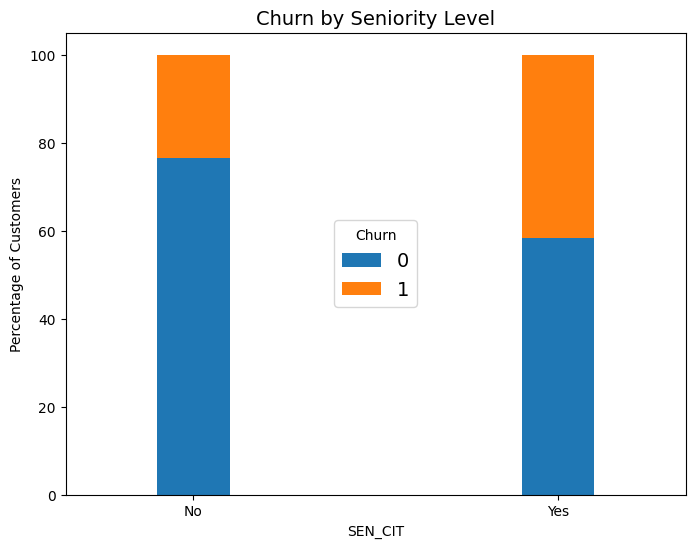

In [ ]:
SEN_CIT_CHU = df.groupby(['SEN_CIT','CHU']).size().unstack()
ax = (SEN_CIT_CHU.T*100.0 / SEN_CIT_CHU.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6))
plt.xticks((0, 1),('No','Yes'))
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Churn by Seniority Level',size = 14)

Text(0.5, 1.0, 'Percentage of customers by their tenure vs Churn')

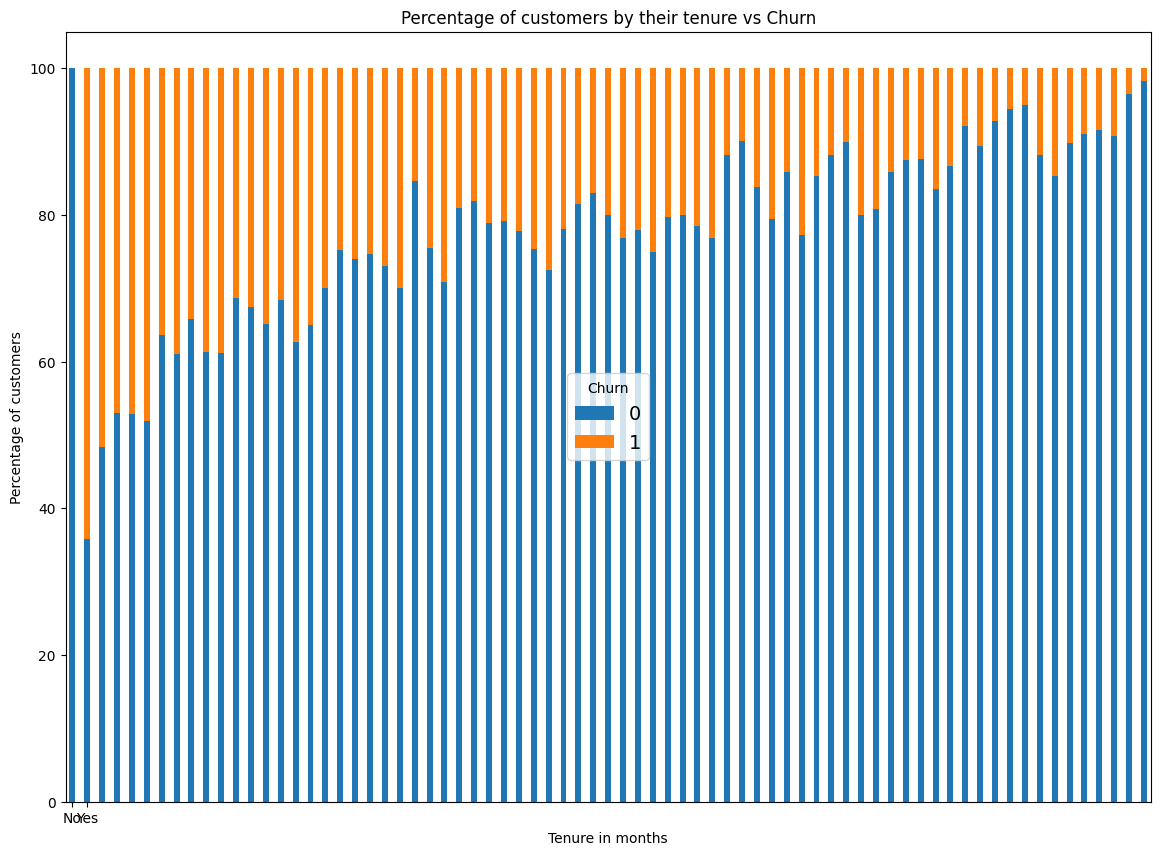

In [ ]:
TEN_CHU = df.groupby(['TEN','CHU']).size().unstack()
ax = (TEN_CHU.T*100.0 / TEN_CHU.T.sum()).T.plot(kind='bar',width = 0.4,stacked = True,rot = 0,figsize = (14,10))
plt.xticks((0, 1),('No','Yes'))
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('Percentage of customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Percentage of customers by their tenure vs Churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

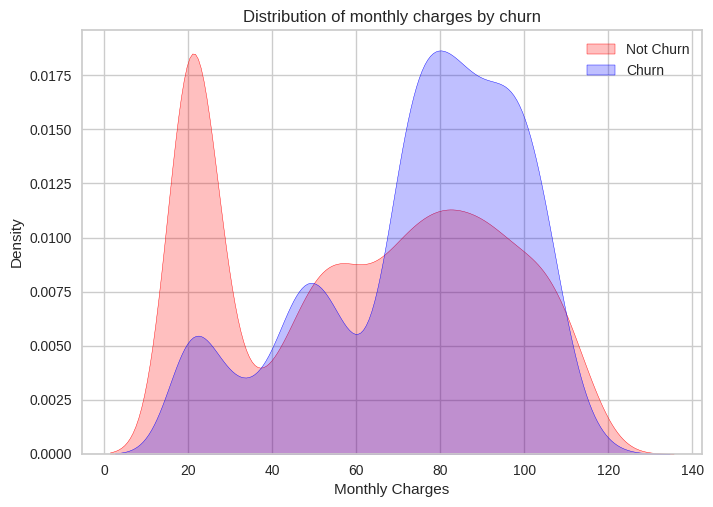

In [ ]:
ax = sns.kdeplot(df.MON_CHA[(df["CHU"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MON_CHA[(df["CHU"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of yearly charges by churn')

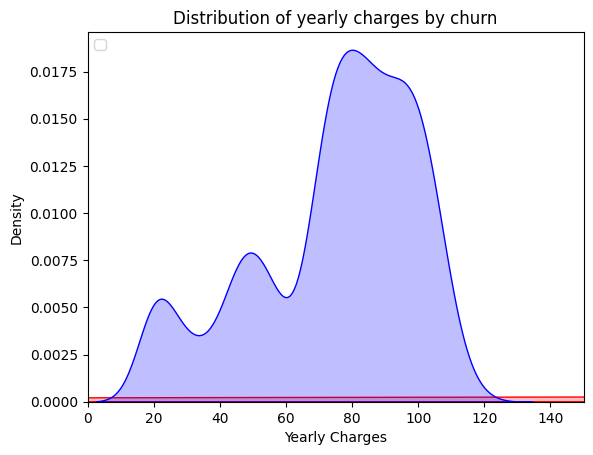

In [ ]:
ax = sns.kdeplot(df.TOT_CHA[(df["CHU"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MON_CHA[(df["CHU"] == 1) ],
                ax =ax, color="Blue", shade= True)
#ax.xlim([-5, 100])
ax.legend(plt.xlim(0, 150),["Not Churn","Churn"],loc='upper left')
ax.set_ylabel('Density')
ax.set_xlabel('Yearly Charges')
ax.set_title('Distribution of yearly charges by churn')

In [ ]:
ContinuousCols=['CHU','TEN','MON_CHA','TOT_CHA','SUM_SER']
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,CHU,TEN,MON_CHA,TOT_CHA,SUM_SER
CHU,1.000000,-0.353522,0.195113,-0.198956,-0.018136
TEN,-0.353522,1.000000,0.239724,0.823903,0.467527
MON_CHA,0.195113,0.239724,1.000000,0.648521,0.850020
TOT_CHA,-0.198956,0.823903,0.648521,1.000000,0.774878
SUM_SER,-0.018136,0.467527,0.850020,0.774878,1.000000


In [ ]:
CorrelationData['CHU'][abs(CorrelationData['CHU']) > 0.5 ]

CHU    1.0
Name: CHU, dtype: float64

In [ ]:
df.head()

,GEN,SEN_CIT,PAR,DEP,TEN,MON_CHA,TOT_CHA,CHU,SUM_SER
0,2,0,1,0,1,29.85,29.85,0,4
1,1,0,0,0,34,56.95,1889.50,0,4
2,1,0,0,0,2,53.85,108.15,1,4
3,1,0,0,0,45,42.30,1840.75,0,4
4,2,0,0,0,2,70.70,151.65,1,2


In [ ]:
Target='CHU'
Feature=['GEN','SEN_CIT','PAR','DEP','TEN','MON_CHA','TOT_CHA','SUM_SER']
X=df[Feature].values
y=df[Target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 200)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = logreg.predict(X_test)

from sklearn import metrics

logreg_score = metrics.accuracy_score(y_test,y_pred)*100

print("\t\tAccuracy Table")
print("Accuracy of Logistic Regression Model: ",logreg_score)

		Accuracy Table
Accuracy of Logistic Regression Model:  79.26596758817922


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7a36e80ef8e0>,
                estimator=LogisticRegression(max_iter=200))

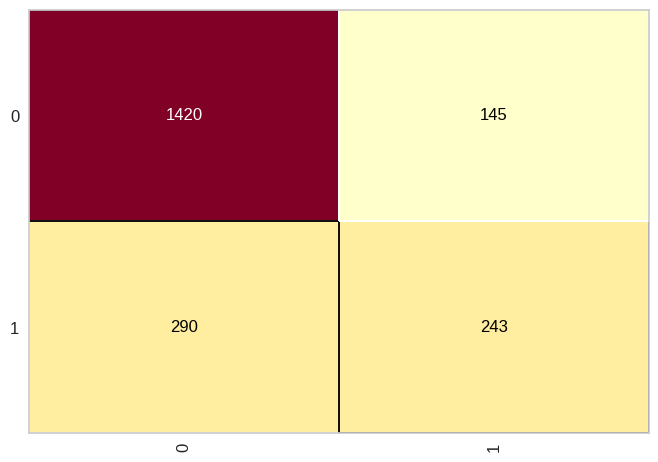

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logreg)
cm.fit(X_train,np.ravel(y_train))
cm.score(X_test,np.ravel(y_test))
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1565
           1       0.63      0.46      0.53       533

    accuracy                           0.79      2098
   macro avg       0.73      0.68      0.70      2098
weighted avg       0.78      0.79      0.78      2098



In [ ]:
df.loc[10]

GEN          1.00
SEN_CIT      0.00
PAR          1.00
DEP          1.00
TEN         13.00
MON_CHA     49.95
TOT_CHA    587.45
CHU          0.00
SUM_SER      3.00
Name: 10, dtype: float64

In [ ]:
logreg.predict([[1,0,1,1,13,49.95,587.45,3]])

array([0])

In [ ]:
df.loc[15]

GEN           2.00
SEN_CIT       0.00
PAR           1.00
DEP           1.00
TEN          69.00
MON_CHA     113.25
TOT_CHA    7895.15
CHU           0.00
SUM_SER       9.00
Name: 15, dtype: float64

In [ ]:
logreg.predict([[2,0,1,1,69,113.25,7895.15,9]])

array([0])

In [ ]:
df.loc[5]

GEN          2.00
SEN_CIT      0.00
PAR          0.00
DEP          0.00
TEN          8.00
MON_CHA     99.65
TOT_CHA    820.50
CHU          1.00
SUM_SER      6.00
Name: 5, dtype: float64

In [ ]:
logreg.predict([[2,0,0,0,8,99.65,820.50,6]])

array([1])